In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mn

In [2]:
df = pd.read_csv('../dataset/train_concat.csv', sep='|')

In [3]:
df.head()

,patient_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,84.31,1.0,NaN,NaN,-0.03,1.0,0.0
1,1,87.0,98.0,NaN,94.5,71.5,NaN,21.0,NaN,NaN,...,NaN,NaN,NaN,84.31,1.0,NaN,NaN,-0.03,2.0,0.0
2,1,85.0,97.0,NaN,89.0,62.0,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,84.31,1.0,NaN,NaN,-0.03,3.0,0.0
3,1,83.0,97.0,36.28,104.0,66.0,NaN,22.0,NaN,NaN,...,9.5,NaN,388.0,84.31,1.0,NaN,NaN,-0.03,4.0,0.0
4,1,81.0,98.0,NaN,87.0,67.0,NaN,18.0,NaN,NaN,...,NaN,NaN,NaN,84.31,1.0,NaN,NaN,-0.03,5.0,0.0


In [4]:
vc = df['SepsisLabel'].value_counts()
pos_pct = round(vc[1] / (vc[0] + vc[1]) * 100, 2)
print('positive rate: ' + str(pos_pct) + '%')

positive rate: 2.18%


In [5]:
missing_pct = (df.isnull().sum() / df.shape[0]) * 100
missing_pct

patient_id            0.000000
HR                    7.767554
O2Sat                12.118742
Temp                 66.214987
SBP                  15.230338
MAP                  10.271062
DBP                  48.482230
Resp                  9.758816
EtCO2               100.000000
BaseExcess           89.641083
HCO3                 91.979409
FiO2                 85.851514
pH                   88.594990
PaCO2                91.261501
SaO2                 95.108612
AST                  98.530060
BUN                  91.867048
Alkalinephos         98.568542
Calcium              95.038364
Chloride             91.719837
Creatinine           93.359859
Bilirubin_direct     99.855874
Glucose              87.757280
Lactate              96.625565
Magnesium            92.252776
Phosphate            94.972291
Potassium            89.166593
Bilirubin_total      98.786910
TroponinI            99.881105
Hct                  88.230863
Hgb                  91.207772
PTT                  95.159619
WBC     

<AxesSubplot:>

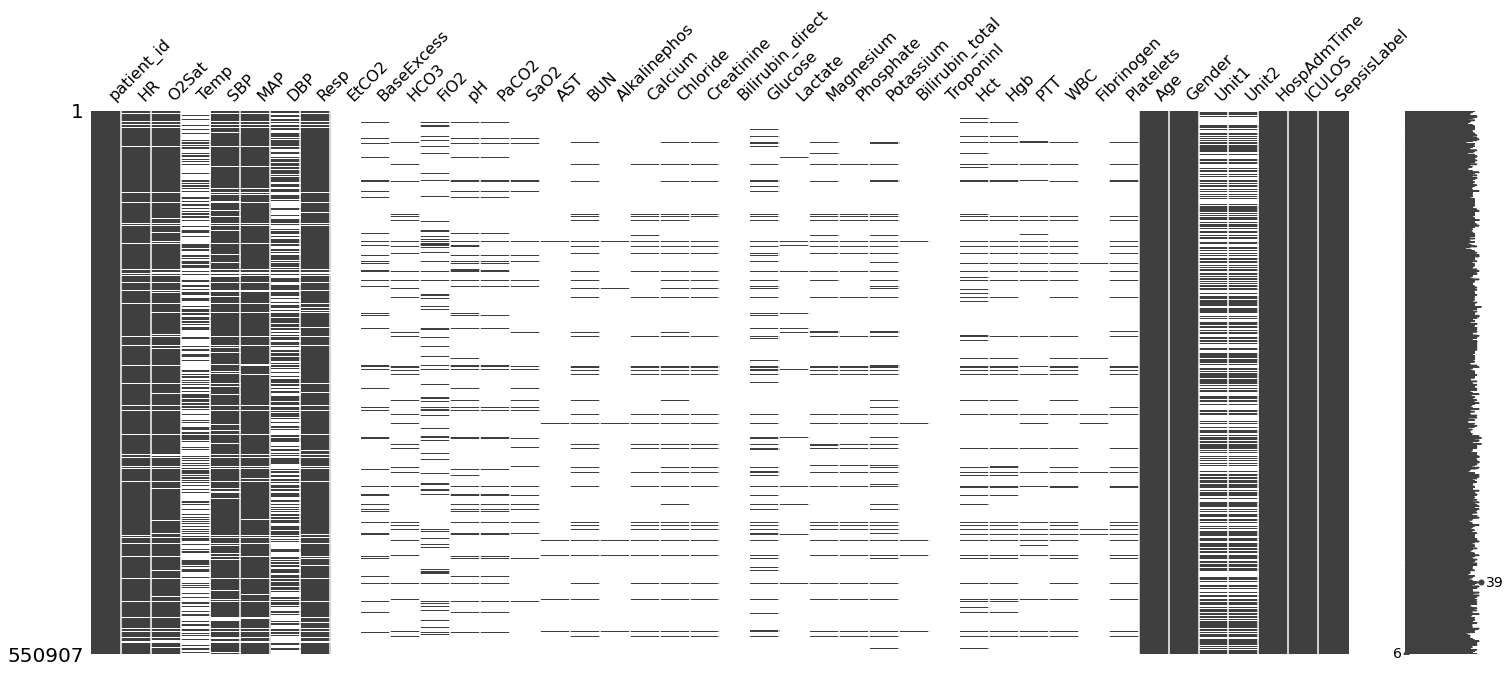

In [6]:
mn.matrix(df)

In [7]:
# drop columns with more than 93% missing rate
# drop unit columns
drop_col = ['Unit1', 'Unit2']
for i in range(1, missing_pct.shape[0]):
    if missing_pct[i] > 93:
        drop_col.append(missing_pct.index[i])

df = df.drop(columns=drop_col)

In [8]:
drop_col

['Unit1',
 'Unit2',
 'EtCO2',
 'SaO2',
 'AST',
 'Alkalinephos',
 'Calcium',
 'Creatinine',
 'Bilirubin_direct',
 'Lactate',
 'Phosphate',
 'Bilirubin_total',
 'TroponinI',
 'PTT',
 'Fibrinogen',
 'Platelets']

In [9]:
df

,patient_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,Magnesium,Potassium,Hct,Hgb,WBC,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84.31,1.0,-0.03,1.0,0.0
1,1,87.0,98.0,NaN,94.5,71.5,NaN,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84.31,1.0,-0.03,2.0,0.0
2,1,85.0,97.0,NaN,89.0,62.0,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84.31,1.0,-0.03,3.0,0.0
3,1,83.0,97.0,36.28,104.0,66.0,NaN,22.0,NaN,30.0,...,2.1,4.0,32.6,10.7,9.5,84.31,1.0,-0.03,4.0,0.0
4,1,81.0,98.0,NaN,87.0,67.0,NaN,18.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,84.31,1.0,-0.03,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550902,14236,65.0,95.0,NaN,126.0,77.0,59.0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.50,1.0,-195.97,22.0,0.0
550903,14236,69.0,94.0,36.89,133.0,82.0,63.0,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.50,1.0,-195.97,23.0,0.0
550904,14236,67.0,93.0,NaN,131.0,77.0,57.0,30.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.50,1.0,-195.97,24.0,0.0
550905,14236,66.0,95.0,NaN,120.0,73.0,54.0,26.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,63.50,1.0,-195.97,25.0,0.0


**Symptoms of Sepsis:**
- Temp < 36˚C or > 38˚C
- HR > 90
- Resp > 20
- SBP ≤ 100
- PaCO2 < 32
- WBC between 4000 and 12000

In [11]:
df.to_csv('../dataset/train_cleaned.csv', sep='|', index=False)

In [12]:
# do the same for validation data
val_df = pd.read_csv('../dataset/val_concat.csv', sep='|')
val_df = val_df.drop(columns=drop_col)

In [13]:
val_df.to_csv('../dataset/val_cleaned.csv', sep='|', index=False)

In [14]:
# do the same for test data
test_df = pd.read_csv('../dataset/test_concat.csv', sep='|')
test_df = test_df.drop(columns=drop_col)
test_df.to_csv('../dataset/test_cleaned.csv', sep='|', index=False)